# Distribuição de frequência

## Importação das bibliotecas e dados originais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## Ordenação

In [3]:
dados = np.sort(dados)

In [4]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [5]:
minimo = dados.min()
minimo

150

In [6]:
maximo = dados.max()
maximo

173

In [7]:
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

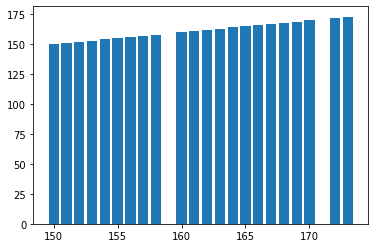

In [8]:
plt.bar(dados, dados);

## Número de classes

- i = 1 + 3.3 log n

In [9]:
n = len(dados)
n

40

In [10]:
i = 1 + 3.3 * np.log10(n)
i

6.286797971382275

In [11]:
i = round(i)
i

6

## Amplitude do intervalo

- h = AA / i
- AA = Xmax - Xmin

In [12]:
AA = maximo - minimo + 1
AA

24

In [13]:
h = AA / i
h

4.0

In [14]:
import math
h = math.ceil(h)
h

4

## Construção da distribuição de frequência

In [15]:
intervalos = np.arange(minimo, maximo + 2, h)
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [16]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0

for i in range(n):
    if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
        intervalo1 += 1
    elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
        intervalo2 += 1
    elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
        intervalo3 += 1
    elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
        intervalo4 += 1
    elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
        intervalo5 += 1
    elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
        intervalo6 += 1

In [17]:
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [18]:
lista_classes = []

for i in range(len(lista_intervalos)):
    lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i + 1] - 1))

In [19]:
lista_classes

['150-153', '154-157', '158-161', '162-165', '166-169', '170-173']

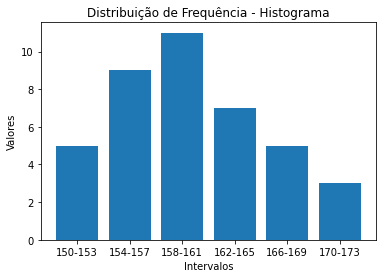

In [20]:
plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de Frequência - Histograma')
plt.xlabel('Intervalos')
plt.ylabel('Valores');

## Distribuição de frequência e histograma com numpy e matplotlib

- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

In [21]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [22]:
frequencia, classes = np.histogram(dados)

In [23]:
frequencia, classes, len(classes) # 10 classes

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2], dtype=int64),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

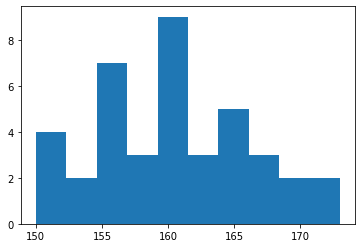

In [24]:
plt.hist(dados, classes);

In [25]:
frequencia, classes = np.histogram(dados, bins = 5) # 5 classes
frequencia, classes, len(classes)

(array([ 6, 10, 12,  8,  4], dtype=int64),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]),
 6)

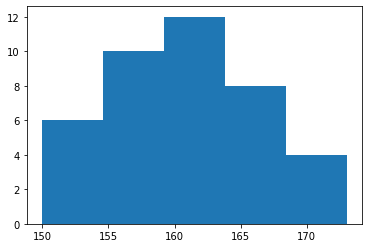

In [26]:
plt.hist(dados,classes);

In [27]:
frequencia, classes = np.histogram(dados, bins = 'sturges')
frequencia, classes, len(classes)

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]),
 8)

**O método sturges foi o utilizado no cálculo anterior, porém o resultado lá ficou em 6 classes pois arredondamos o resultado (6.28) para baixo (6), quando o np.histogram(bins = 'sturges') arredonda para cima (7). Para alcançar esse resultado manualmente, ao invés de usar round(6.28), usaríamos o math.ceil(6.28), que daria 7 classes.**

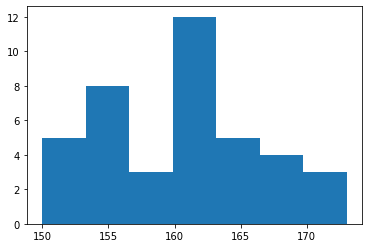

In [28]:
plt.hist(dados, classes);

## Distribuição de frequência e histograma com pandas e seaborn

In [29]:
type(dados)

numpy.ndarray

In [30]:
dataset = pd.DataFrame({'dados': dados})
dataset.head()

,dados
0,160
1,165
2,167
3,164
4,160


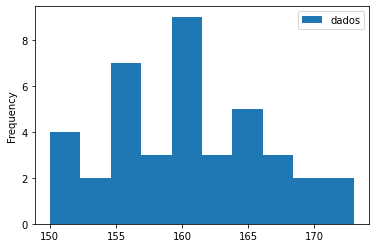

In [31]:
dataset.plot.hist();

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


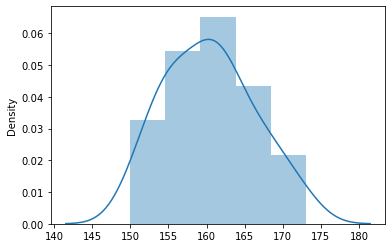

In [32]:
sns.distplot(dados);

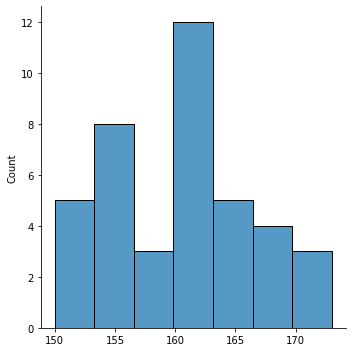

In [33]:
sns.displot(dados);

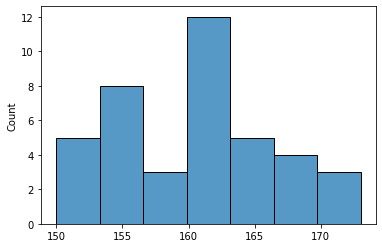

In [34]:
sns.histplot(dados);

## Exercício - idade census.csv

Olá,

O objetivo desta tarefa é aplicar a distribuição de frequência utilizando o atributo age da base de dados do censo

Carregue a base de dados census.csv
Faça testes utilizando o parâmetro bins para visualizar a distribuição dos dados
Na próxima aula você pode conferir o vídeo com a solução

Bom trabalho!

Jones

In [35]:
import pandas as pd
dataset = pd.read_csv('Bases de dados/census.csv')

In [36]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

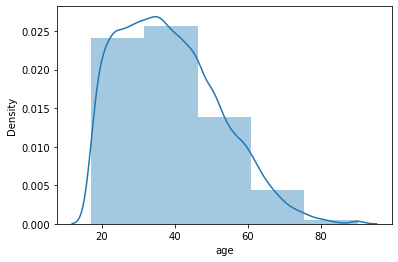

In [37]:
sns.distplot(dataset['age'], bins = 5)

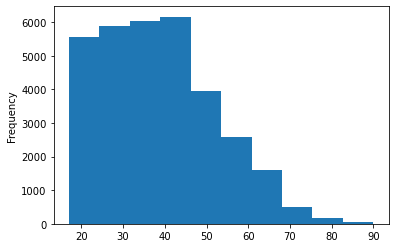

In [38]:
dataset['age'].plot.hist();

In [39]:
len(dataset)

32561

In [40]:
i = 1 + 3.3 * np.log10(32561)
i

15.891902523173354

In [41]:
i = math.ceil(i)
i

16

In [42]:
AA = dataset['age'].max() - dataset['age'].min() + 1
AA

74

In [43]:
h = math.ceil(AA / i)
h

5

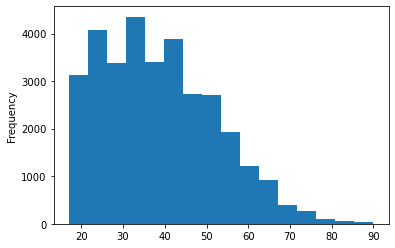

In [44]:
dataset['age'].plot.hist(bins = 16);

In [45]:
faixas_etarias = [0, 17, 25, 35, 42, 60, 90]
dataset['faixas_etarias'] = pd.cut(dataset['age'], bins = faixas_etarias,
                                   labels = ['Faixa 1', 'Faixa 2', 'Faixa 3', 'Faixa 4', 'Faixa 5', 'Faixa 6'])

In [46]:
dataset

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,faixas_etarias
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Faixa 4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Faixa 5
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Faixa 4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Faixa 5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Faixa 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Faixa 3
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Faixa 4
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Faixa 5
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Faixa 2


In [47]:
dataset = dataset.rename(columns={'faixas_etarias': 'faixa-etaria'})
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,faixa-etaria
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Faixa 4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Faixa 5
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Faixa 4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Faixa 5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Faixa 3


In [48]:
dataset['faixa-etaria'].unique()

['Faixa 4', 'Faixa 5', 'Faixa 3', 'Faixa 2', 'Faixa 6', 'Faixa 1']
Categories (6, object): ['Faixa 1' < 'Faixa 2' < 'Faixa 3' < 'Faixa 4' < 'Faixa 5' < 'Faixa 6']

In [49]:
dataset.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income', 'faixa-etaria'],
      dtype='object')

In [50]:
dataset = dataset[['faixa-etaria', 'age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income']]

In [51]:
dataset.head()

,faixa-etaria,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa 4,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa 5,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa 4,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa 5,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa 3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Regras de associação

In [52]:
dataset.head()

,faixa-etaria,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa 4,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa 5,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa 4,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa 5,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa 3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
dataset_apriori = dataset[['faixa-etaria', 'workclass', 'education', 'marital-status', 'relationship', 'occupation',
                            'sex', 'native-country', 'income']]

In [54]:
dataset_apriori.head()

,faixa-etaria,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa 4,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa 5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa 4,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa 5,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa 3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [56]:
dataset_apriori.shape

(32561, 9)

In [57]:
dataset_apriori = dataset_apriori.sample(n=1000)
dataset_apriori.shape

(1000, 9)

In [58]:
transacoes = []

for i in range(len(dataset_apriori)):
    transacoes.append([str(dataset_apriori.values[i, j]) for j in range(dataset_apriori.shape[1])])

In [59]:
len(transacoes)

1000

In [60]:
transacoes[:2]

[['Faixa 3',
  ' Private',
  ' Masters',
  ' Never-married',
  ' Not-in-family',
  ' Machine-op-inspct',
  ' Female',
  ' United-States',
  ' <=50K'],
 ['Faixa 5',
  ' ?',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' ?',
  ' Male',
  ' United-States',
  ' <=50K']]

In [61]:
!pip install apyori

In [62]:
from apyori import apriori

In [63]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)
resultados = list(regras)

In [64]:
len(resultados)

35

In [65]:
resultados

[RelationRecord(items=frozenset({' <=50K'}), support=0.767, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.767, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.356, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.356, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.338, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.338, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.403, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.403, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.644, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.644, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0

In [79]:
resultados[12][2][0][2]

0.55

In [80]:
confianca = []
suporte = []

for i in range(len(resultados)):
    con = [i, resultados[i][2][0][2]]
    sup = [i, resultados[i][1]]
    confianca.append(con)
    suporte.append(sup)

confianca, suporte

([[0, 0.767],
  [1, 0.356],
  [2, 0.338],
  [3, 0.403],
  [4, 0.644],
  [5, 0.456],
  [6, 0.345],
  [7, 0.701],
  [8, 0.883],
  [9, 0.327],
  [10, 0.44],
  [11, 0.322],
  [12, 0.55],
  [13, 0.665],
  [14, 0.312],
  [15, 0.31],
  [16, 0.403],
  [17, 0.403],
  [18, 0.362],
  [19, 0.407],
  [20, 0.442],
  [21, 0.571],
  [22, 0.304],
  [23, 0.408],
  [24, 0.303],
  [25, 0.611],
  [26, 0.31],
  [27, 0.38],
  [28, 0.471],
  [29, 0.403],
  [30, 0.362],
  [31, 0.362],
  [32, 0.366],
  [33, 0.382],
  [34, 0.362]],
 [[0, 0.767],
  [1, 0.356],
  [2, 0.338],
  [3, 0.403],
  [4, 0.644],
  [5, 0.456],
  [6, 0.345],
  [7, 0.701],
  [8, 0.883],
  [9, 0.327],
  [10, 0.44],
  [11, 0.322],
  [12, 0.55],
  [13, 0.665],
  [14, 0.312],
  [15, 0.31],
  [16, 0.403],
  [17, 0.403],
  [18, 0.362],
  [19, 0.407],
  [20, 0.442],
  [21, 0.571],
  [22, 0.304],
  [23, 0.408],
  [24, 0.303],
  [25, 0.611],
  [26, 0.31],
  [27, 0.38],
  [28, 0.471],
  [29, 0.403],
  [30, 0.362],
  [31, 0.362],
  [32, 0.366],
  [33, 0.

In [91]:
suporte = pd.DataFrame(suporte)

In [92]:
suporte

,0,1
0,0,0.767
1,1,0.356
2,2,0.338
3,3,0.403
4,4,0.644
5,5,0.456
6,6,0.345
7,7,0.701
8,8,0.883
9,9,0.327


In [110]:
suporte_ordem = suporte.sort_values(by=1, ascending=False, ignore_index=True)
suporte_ordem = suporte_ordem.rename(columns={0: 'Resultado', 1: 'Suporte'})

In [111]:
suporte_ordem

,Resultado,Suporte
0,8,0.883
1,0,0.767
2,7,0.701
3,13,0.665
4,4,0.644
5,25,0.611
6,21,0.571
7,12,0.550
8,28,0.471
9,5,0.456


In [112]:
resultados[8]

RelationRecord(items=frozenset({' United-States'}), support=0.883, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' United-States'}), confidence=0.883, lift=1.0)])

In [113]:
resultados[0]

RelationRecord(items=frozenset({' <=50K'}), support=0.767, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.767, lift=1.0)])